### Exercise 1

Suppose we have a lake with an infinite number of red and green fish. Red fish are disgusting (bad, bad) and green fish are tasty (good, good). 

Run the following simulation a large number of times (e.g. $T = 10,000$ runs): 
There are $1,000$ fishermen each of whom has an unknown probability $\mu=0.5$ of catching red fish. Each fisherman independently catches $10$ fish. We focus on the following fishing strategy:

1. $f_1$ is the first fisherman
2. $f_r$ is a random fisherman
3. $f_*$ is the fisher with the lowest frequency of red fish among all fishers.


**(a)**
Record the $T$ fractions $\mu_n^1, \mu_n^r$, and $\mu_n^*$ of red fish for the respective three fishermen. Plot the histograms of the distributions of $\mu_n^1, \mu_n^r$, and $\mu_n^*$.

**(b)**
Using (a), plot estimates for $\mathbb{P}(|\mu_n-\mu|\geq \varepsilon)$ as a function of $\varepsilon>0$ together with the Hoeffding bound. 

**(c)** 
Which fishermen obey the Hoeffding bound, and which ones do not? Explain why. Relate the results to learning. 

##### Solution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
n_runs   = 10000    # trials
n_funs   = 1000     # fishermen (as functions)
n_sample = 10       # fishes

In [4]:
def sample(n_funs, n_sample):
    X = np.random.choice([0, 1], size=(n_funs, n_sample), p=[0.5, 0.5])
    return X

def run(n_runs, n_funs, n_sample):
    mu_n = np.zeros((3, n_runs))
    for t in range(n_runs):
        X = sample(n_funs, n_sample)
        X = X.mean(axis=1)
        mu_n[0,t] = X[0]
        mu_n[1,t] = X[np.random.randint(0, n_funs)]
        mu_n[2,t] = X.min()
    return mu_n

In [5]:
mu_n = run(n_runs, n_funs, n_sample)
print(mu_n.mean(axis=1))


[0.50152 0.50139 0.03745]


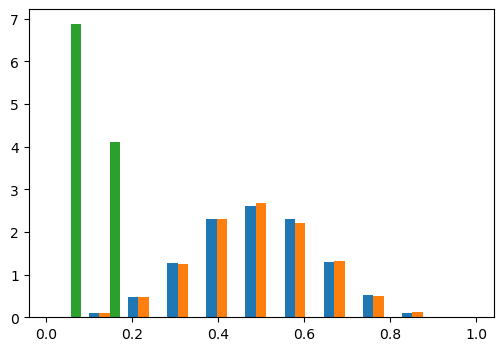

In [6]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
ax.hist(mu_n.T, bins=11, density=True)
plt.show()

In [7]:
eps = np.arange(0.01, 0.9, 0.02)
hoeffding = 2*np.exp(-2*n_sample*eps**2)

P = np.zeros((3, len(eps)))
for j, e in enumerate(eps):
    for i in range(3):
        d = np.abs(mu_n[i,:]-0.5)
        P[i,j] = np.mean(d > e)

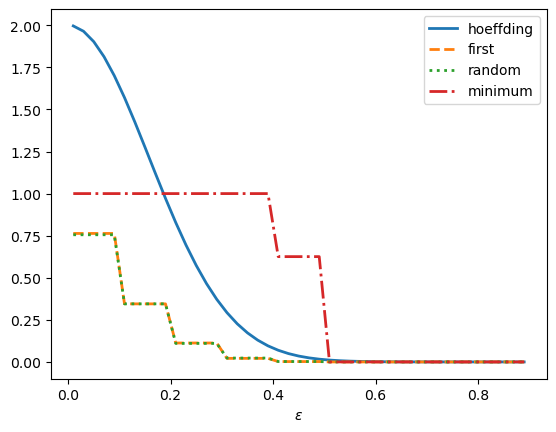

In [10]:
plt.plot(eps, hoeffding, lw=2, label='hoeffding')
plt.plot(eps, P[0], '--', lw=2, label='first')
plt.plot(eps, P[1], ':', lw=2, label='random')
plt.plot(eps, P[2], '-.', lw=2, label='minimum')
plt.xlabel(r'$\varepsilon$')
plt.legend()
plt.show()

The fishermen $f_1$ and $f_r$ obey the Hoeffding bound, while the fisherman $f_*$ violates it. See the lecture on failure of ERM and on the union bound.

Note the following analogy

+ The *fishermen* are the hypotheses
+ The *fish* are the data points.
+ *Catching fish* corresponds to making predictions on data points
+ *Red fish* represent misclassifications
+ The *fishing strategy* that selects $f_*$ is the learning algorithm